# Comitês

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
seed = 17
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer, precision_score

In [2]:
import numpy as np # Numpy: biblioteca para manipular vetores e matrizes
import pandas as pd # Pandas: biblioteca para manipular tabelas
import scipy.stats as ss
from sklearn.metrics import confusion_matrix

In [21]:
lista_both = [ 'uplink_size_mean',
'uplink_size_median',
'uplink_size_MAD',
'uplink_size_STD',
'uplink_size_Skewness',
'uplink_size_Kurtosis',
'uplink_size_MAX',
'uplink_size_MIN',
'uplink_size_MeanSquare',
'downlink_size_mean',
'downlink_size_median',
'downlink_size_MAD',
'downlink_size_STD',
'downlink_size_Skewness',
'downlink_size_Kurtosis',
'downlink_size_MAX',
'downlink_size_MIN',
'downlink_size_MeanSquare',
'both_links_size_mean',
'both_links_size_median',
'both_links_size_MAD',
'both_links_size_STD',
'both_links_size_Skewness',
'both_links_size_Kurtosis',
'both_links_size_MAX',
'both_links_size_MIN',
'both_links_size_MeanSquare',
'uplink_interval_mean',
'uplink_interval_median',
'uplink_interval_MAD',
'uplink_interval_STD',
'uplink_interval_Skewness',
'uplink_interval_Kurtosis',
'uplink_interval_MAX',
'uplink_interval_MIN',
'uplink_interval_MeanSquare',
'downlink_interval_mean',
'downlink_interval_median',
'downlink_interval_MAD',
'downlink_interval_STD',
'downlink_interval_Skewness',
'downlink_interval_Kurtosis',
'downlink_interval_MAX',
'downlink_interval_MIN',
'downlink_interval_MeanSquare',
'both_links_interval_mean',
'both_links_interval_median',
'both_links_interval_MAD',
'both_links_interval_STD',
'both_links_interval_Skewness',
'both_links_interval_Kurtosis',
'both_links_interval_MAX',
'both_links_interval_MIN',
'both_links_interval_MeanSquare',
'classe']

#### Carregando dataset UPLINK

In [22]:
#lista_up = ['V1_size','V2_size','V3_size','V4_size','V5_size','V6_size','V7_size','V8_size','V9_size','V1_interval','V2_interval','V3_interval','V4_interval','V5_interval','V6_interval','V7_interval','V8_interval','V9_interval','classe']

#for i in range(1,56):
    #if i < 55:
        #lista_both.append(f'V{i}')
    #else:
        #lista_both.append('label')
#lista_both

test = []
train = []
frame_both_links = []

for i in range(1,4):
    test.append(pd.read_excel(f'./dataset_para_predicao/pub_dataset{i}.xls',names=lista_both))
    print(f"Tamanho df {i}: ",test[-1].shape)

frames = test
df_train1 = pd.concat(frames)

Tamanho df 1:  (19379, 55)
Tamanho df 2:  (17255, 55)
Tamanho df 3:  (5499, 55)


In [23]:
print(df_train1.shape)


(42133, 55)


In [24]:
from sklearn.utils import shuffle

df_train1 = shuffle(df_train1, random_state=17)
df_train1

,uplink_size_mean,uplink_size_median,uplink_size_MAD,uplink_size_STD,uplink_size_Skewness,uplink_size_Kurtosis,uplink_size_MAX,uplink_size_MIN,uplink_size_MeanSquare,downlink_size_mean,...,both_links_interval_mean,both_links_interval_median,both_links_interval_MAD,both_links_interval_STD,both_links_interval_Skewness,both_links_interval_Kurtosis,both_links_interval_MAX,both_links_interval_MIN,both_links_interval_MeanSquare,classe
15972,17.149551,77.465216,0.001044,0.001294,4.097705,15.153765,359.962624,0.000128,78.435254,257.761905,...,266.18,61.984257,240.0,17.7912,2.670707,8.856985,579,204,273.231440,0
1825,0.006874,0.009000,0.002253,0.002789,1.227617,-0.009703,0.027504,0.000016,0.011205,96.100000,...,632.15,517.972005,1130.0,11.1195,-0.080854,-2.001854,1145,70,815.613677,1
8253,0.002916,0.005768,0.000900,0.000949,2.725043,6.501892,0.025344,0.000002,0.006380,98.225806,...,463.18,412.868296,147.0,105.2646,0.406192,-1.401333,1543,76,619.105274,1
575,0.004247,0.005648,0.002648,0.001106,2.401645,5.223501,0.026699,0.000258,0.007015,119.795455,...,527.91,498.440398,138.0,100.8168,0.367329,-1.863440,1130,70,724.325459,1
16948,0.055017,0.172367,0.005150,0.003971,3.626270,11.974496,0.811189,0.000236,0.178639,311.055556,...,1117.60,686.458883,1676.0,0.0000,-0.468804,-1.728987,1676,216,1309.787502,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11665,0.016513,0.014591,0.014973,0.017683,0.551439,-0.788706,0.051614,0.000136,0.021935,845.020833,...,658.10,560.969426,259.5,64.4931,0.665996,-1.471964,1476,216,862.922615,0
6252,0.010899,0.012250,0.006271,0.008325,0.649439,1.630187,0.030886,0.000169,0.016140,119.111111,...,818.30,693.039762,1362.0,284.6592,-0.075125,1.043290,1554,76,1070.100911,1
13795,0.003386,0.004579,0.001621,0.002124,1.730244,1.996058,0.017137,0.000116,0.005649,285.150000,...,946.97,668.349400,694.0,708.6828,0.052481,-1.870799,1676,216,1157.141000,0
15580,0.993841,3.266904,0.001198,0.001681,3.278982,9.743158,14.906540,0.000128,3.380587,554.478300,...,407.49,415.402900,228.0,17.7912,2.365091,4.044317,1676,216,580.415400,0


In [30]:
import seaborn as sns
df_train1.classe.value_counts(normalize=True).round(3)

1    0.525
0    0.475
Name: classe, dtype: float64

In [31]:
df_train_noduplicates = df_train1.drop_duplicates()


In [37]:
print(f'Resultante com duplicados {df_train1.shape}')
print(f'Resultante sem duplicados {df_train_noduplicates.shape}')
print(f'Total de valores duplicados: {df_train_noduplicates.shape[0]-df_train1.shape[0]}')

Resultante com duplicados (42133, 55)
Resultante sem duplicados (38166, 55)
Total de valores duplicados: -3967


In [38]:
y= df_train_noduplicates.classe.to_numpy()


In [39]:
from collections import Counter
print(Counter(y))
X = df_train_noduplicates

Counter({1: 22113, 0: 16053})


### Balanceando

### Normalizando por padronização



In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
Xstd = scaler.fit_transform(X)
df_balanced_stand = pd.DataFrame(Xstd, columns=X.columns, index=X.index)

In [41]:
df_balanced_stand

,uplink_size_mean,uplink_size_median,uplink_size_MAD,uplink_size_STD,uplink_size_Skewness,uplink_size_Kurtosis,uplink_size_MAX,uplink_size_MIN,uplink_size_MeanSquare,downlink_size_mean,...,both_links_interval_mean,both_links_interval_median,both_links_interval_MAD,both_links_interval_STD,both_links_interval_Skewness,both_links_interval_Kurtosis,both_links_interval_MAX,both_links_interval_MIN,both_links_interval_MeanSquare,classe
15972,0.529206,0.853105,-0.029778,-0.025239,1.362031,0.962418,0.851089,-0.020546,0.848817,-0.017706,...,-1.236977,-2.088362,-0.509309,-0.593701,1.265511,0.813654,-2.062680,0.822200,-1.576186,-1.173669
1825,-0.053018,-0.066964,-0.029403,-0.024913,-0.613996,-0.760712,-0.070556,-0.020580,-0.066920,-0.608127,...,0.110984,0.196736,1.289402,-0.623662,-0.636260,-0.522690,-0.571676,-0.947337,0.126768,0.852029
8253,-0.053153,-0.067003,-0.029823,-0.025314,0.416967,-0.020754,-0.070561,-0.020584,-0.066977,-0.600363,...,-0.511376,-0.329972,-0.697264,-0.200870,-0.299633,-0.448787,0.476768,-0.868104,-0.490222,0.852029
575,-0.053107,-0.067004,-0.029281,-0.025280,0.194311,-0.166027,-0.070558,-0.020507,-0.066969,-0.521586,...,-0.272959,0.098857,-0.715454,-0.220844,-0.326493,-0.505656,-0.611190,-0.947337,-0.159855,0.852029
16948,-0.051383,-0.065024,-0.028505,-0.024655,1.037452,0.601136,-0.068549,-0.020514,-0.064965,0.176933,...,1.899019,1.041077,2.392880,-0.673599,-0.904396,-0.489109,0.827128,0.980666,1.678360,-1.173669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,-0.052938,-0.066954,-0.028820,-0.024202,-0.902754,-0.862571,-0.070554,-0.020580,-0.066896,-0.585251,...,0.484724,0.114214,1.289402,-0.673599,-0.906730,-0.494983,-0.611190,-0.947337,0.351650,0.852029
698,-0.052702,-0.066872,-0.027740,-0.023424,-0.896630,-0.511943,-0.070497,-0.020527,-0.066780,-0.432965,...,-1.530458,-2.005536,-0.699285,-0.587043,0.684609,0.365828,-2.381428,-0.115390,-1.799209,0.852029
6252,-0.052882,-0.066926,-0.028157,-0.023705,-1.012065,-0.574360,-0.070547,-0.020534,-0.066863,-0.524086,...,0.796621,1.074056,1.758279,0.604766,-0.632300,-0.147939,0.505745,-0.868104,0.925799,0.852029
13795,-0.053137,-0.067017,-0.029599,-0.025058,-0.267942,-0.532783,-0.070582,-0.020550,-0.066985,0.082321,...,1.270546,0.950325,0.408235,2.508997,-0.544104,-0.506561,0.827128,0.980666,1.199085,-1.173669


### Retirando as features 


### Com heuristica

In [42]:
# training dataset
#df_features_selected = pd.DataFrame(Xstd, columns=X_balanced.columns, index=X_balanced.index)
#df_features_selected = df_features_selected.drop(['V2_size','V3_size','V6_size','V7_size','V8_size','V2_interval','V4_interval','V5_interval'], axis=1)


In [43]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components= 5 )
#df_features_selected = pca.fit_transform(df_balanced_stand)
#print(pca)
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)


In [44]:
# training dataset
X = df_balanced_stand
y = y
print(f'X:{X.shape} y:{y.shape} ')

X:(38166, 55) y:(38166,) 


In [45]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

print(f'X_train:{X_train.shape} y_train:{y_train.shape} ')
print(Counter(y_train))
print(f'X_test:{X_test.shape} y_test:{y_test.shape} ')
print(Counter(y_test))

X_train:(19083, 55) y_train:(19083,) 
Counter({1: 11066, 0: 8017})
X_test:(19083, 55) y_test:(19083,) 
Counter({1: 11047, 0: 8036})


### Testing with knn 



In [48]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

knn3 = KNeighborsClassifier(n_neighbors=3) 

print('Fitting data')
knn3.fit(X_train, y_train)
print('Predicting data')
ypredicted = knn3.predict(X_test)
print(np.count_nonzero(y_test == ypredicted), f"out of {ypredicted.shape}")


Fitting data
Predicting data
19076 out of (19083,)


In [49]:
print(f' KNN: acuracia: {accuracy_score(ypredicted, y_test)}  Precisão :{precision_score(ypredicted, y_test)}')

 KNN: acuracia: 0.9996331813656134  Precisão :0.9996379107449986


In [50]:
confusion_matrix(y_test, ypredicted)

array([[ 8033,     3],
       [    4, 11043]])

## Semente aleatória para reproducibilidade dos experimentos (reproducão dos experimentos)
seed = 17

In [461]:
scorer = make_scorer(precision_score) # Teste outras

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

gscv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

algorithms = {
    'tree':  GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(random_state=seed))]), 
        param_grid={
            'tree__max_depth': [2, 4, 5],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'bigtree':  GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=seed))]), 
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'kNN':  GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            #('scaler', MinMaxScaler(feature_range=(0, 1))),
            #('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]), 
        param_grid={
            #'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring=scorer,
        cv=gscv),
    'nb': GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            #('selector', SelectKBest()),
            ('nb', GaussianNB())]), 
        param_grid={
            #'selector__k': [3, 5, 10],
        },
        scoring=scorer,
        cv=gscv),
    'svmlinear': GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            #('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),
    'svmrbf': GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            #('scaler', StandardScaler()),
            ('pca', PCA(random_state=seed)),
            ('svm', SVC(kernel='rbf', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),
}

In [379]:
import time

In [380]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
# df_balanced_stand, y_balanced 
result = {}
result_score = {}
i = 1
# X_train, X_test, y_train, y_test

for alg, clf in algorithms.items():
    start = time.time()
    print(f'Train with algorithm {i}: {alg}')
    i += 1
    result[alg] = cross_val_predict(clf, X_train, y_train, n_jobs= -1,  cv=gscv)
    #result_score[alg] = cross_val_score(clf, X, y)
    print(f'acuracia:{accuracy_score(y_train,result[alg]) } ')
    print(result[alg])
    print(f"it took {time.time() - start} seconds.")

Train with algorithm 1: tree
acuracia:1.0 
[0 1 1 ... 1 0 0]
it took 5.040150165557861 seconds.
Train with algorithm 2: bigtree
acuracia:1.0 
[0 1 1 ... 1 0 0]
it took 1.1310091018676758 seconds.
Train with algorithm 3: kNN
acuracia:0.9992908639640704 
[0 1 1 ... 1 0 0]
it took 3.8097827434539795 seconds.
Train with algorithm 4: nb
acuracia:0.9984635385888193 
[0 1 1 ... 1 0 0]
it took 0.08035588264465332 seconds.
Train with algorithm 5: svmlinear
acuracia:1.0 
[0 1 1 ... 1 0 0]
it took 5.228136301040649 seconds.
Train with algorithm 6: svmrbf
acuracia:0.9991726746247489 
[0 1 1 ... 1 0 0]
it took 24.545283794403076 seconds.


In [381]:
for alg, clf in algorithms.items():
    print(f'{alg}:  precision:{precision_score(y_train,result[alg])}, accuracy_score: {accuracy_score(y_train,result[alg])}  ')

tree:  precision:1.0, accuracy_score: 1.0  
bigtree:  precision:1.0, accuracy_score: 1.0  
kNN:  precision:0.9995300751879699, accuracy_score: 0.9992908639640704  
nb:  precision:1.0, accuracy_score: 0.9984635385888193  
svmlinear:  precision:1.0, accuracy_score: 1.0  
svmrbf:  precision:0.999764871855161, accuracy_score: 0.9991726746247489  


In [174]:
result = pd.DataFrame.from_dict(result)

result

,tree,bigtree,kNN,nb,svmlinear,svmrbf
0,0,1,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,1,1,1,1,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
9005,1,1,1,1,1,1
9006,0,0,0,1,0,0
9007,0,1,1,1,1,1
9008,0,0,0,1,0,0


In [175]:
for alg, clf in algorithms.items():
    print(clf)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
             estimator=Pipeline(steps=[('tree',
                                        DecisionTreeClassifier(random_state=17))]),
             param_grid={'tree__criterion': ['entropy', 'gini'],
                         'tree__max_depth': [2, 4, 5]},
             scoring=make_scorer(precision_score))
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
             estimator=Pipeline(steps=[('tree',
                                        DecisionTreeClassifier(random_state=17))]),
             param_grid={'tree__criterion': ['entropy', 'gini']},
             scoring=make_scorer(precision_score))
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
             estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 3, 5], 'knn__p': [1, 2]},
             scoring=make_scorer(precision_score))
GridSearchCV(cv=Str

In [176]:
def phi(a, b, expected):
    errors = np.logical_or(a != expected, b != expected)
    try:
        return np.count_nonzero(np.logical_and(a == b, errors)) / np.count_nonzero(errors)
    except:
        return 0

# X_balanced, y_balanced
correrrors = np.ones((len(algorithms), len(algorithms)))

for i in range(len(algorithms)):
    for j in range(i + 1, len(algorithms)):
        correrrors[i, j] = phi(result[result.columns[i]], result[result.columns[j]], y_train)
        correrrors[j, i] = correrrors[i, j]    
        
print(correrrors)

[[1.         0.03338068 0.01358113 0.08305248 0.01605839 0.01560178]
 [0.03338068 1.         0.17058824 0.01831729 0.08805031 0.0962963 ]
 [0.01358113 0.17058824 1.         0.01693321 0.07086614 0.16842105]
 [0.08305248 0.01831729 0.01693321 1.         0.0100471  0.00314268]
 [0.01605839 0.08805031 0.07086614 0.0100471  1.         0.26865672]
 [0.01560178 0.0962963  0.16842105 0.00314268 0.26865672 1.        ]]


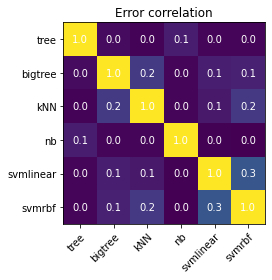

In [177]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
im = ax.imshow(correrrors)

ax.set_xticks(np.arange(len(result.columns)))
ax.set_yticks(np.arange(len(result.columns)))
ax.set_xticklabels(result.columns)
ax.set_yticklabels(result.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(result.columns)):
    for j in range(len(result.columns)):
        text = ax.text(j, i, round(correrrors[i, j], 1),
                       ha="center", va="center", color="w")

ax.set_title("Error correlation")
fig.tight_layout()
plt.show()

## Todos são melhores que a média?

In [64]:
# random classifier
mode = lambda x: ss.mode(x).mode[0]
random = np.mean(mode(y) == y)
print(random)

0.5


In [65]:
result.apply(lambda ypred: np.mean(ypredicted == y_test))

tree         0.995332
bigtree      0.995332
kNN          0.995332
nb           0.995332
svmlinear    0.995332
svmrbf       0.995332
dtype: float64

## Combinando classificadores

In [ ]:
result['kNN+tree+svmrbf'] = result.filter(['kNN', 'tree', 'svmrbf']).apply(mode, axis=1)
result['nb+svmlinear+svmrbf'] = result.filter(['nb', 'svmlinear', 'svmrbf']).apply(mode, axis=1)
result['kNN+bigtree+svmrbf'] = result.filter(['kNN', 'bigtree', 'svmrbf']).apply(mode, axis=1)

In [ ]:
result.apply(lambda ypred: np.mean(ypred == y_balanced))

**nota**: podem existir outros casos de melhoras/pioras.

# Bagging, boosting, etc

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

In [ ]:
algorithms = {
    'bagging':  
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', BaggingClassifier(random_state=seed))]),
    'forest':  
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', RandomForestClassifier(random_state=seed))]),
    #'kNN+tree+svmrbf':
    #    VotingClassifier([ ])
    # Testar outros
}

In [ ]:
from sklearn.model_selection import cross_val_predict

for alg, clf in algorithms.items():
  result[alg] = cross_val_predict(clf, X_train, y_train, cv=cv)

In [ ]:
result.apply(lambda ypred: np.mean(ypred == y_train))

### Rede neural
X_train, X_test, y_train, y_test
X_balanced_both, y_balanced_both

In [52]:
from sklearn.neural_network import MLPClassifier

In [53]:
from sklearn.preprocessing import StandardScaler

In [99]:
model_NN = MLPClassifier(hidden_layer_sizes=(20, 2),
                      activation='relu',
                      solver='adam',
                      max_iter=200,
                      random_state=15,
                      early_stopping=True,
                      #verbose= True,
                      validation_fraction=0.9)

In [55]:
model_NN.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 2), random_state=15)

In [56]:
from sklearn.metrics import accuracy_score, mean_absolute_error

In [57]:
ypredicted = model_NN.predict(X_test)

In [58]:
from sklearn.metrics import f1_score
print(f1_score(ypredicted, y_test))

0.9999547408916044


In [61]:
print(accuracy_score(ypredicted, y_test))

0.9999475973379448


In [62]:
confusion_matrix(y_test, ypredicted)

array([[ 8035,     1],
       [    0, 11047]])

In [63]:
tn, fp, fn, tp =  confusion_matrix(y_test, ypredicted).ravel()
(tn, fp, fn, tp)

(8035, 1, 0, 11047)

In [64]:
precision = (tp)/(tp+fp)
precision

0.9999094858797972

In [65]:
revocacao = tp/(tp+fn)
revocacao

1.0

In [66]:
especificidade = tn/(tn+fp)
especificidade

0.9998755599800896

In [521]:
ypredicted_validation = model_NN.predict(X_validation)

In [522]:
confusion_matrix(y_validation, ypredicted_validation)

array([[1111,    0],
       [   9, 1270]])

In [91]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import metrics

gscv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
gscv

StratifiedKFold(n_splits=10, random_state=17, shuffle=True)

In [100]:
scores = cross_validate(model_NN, X, y, n_jobs=-1, cv = gscv, scoring='accuracy')

In [101]:
scores

{'fit_time': array([2.02278614, 1.98948598, 2.27331805, 1.84258795, 1.69111395,
        1.63955903, 1.90405107, 1.91944981, 1.3499608 , 1.29238796]),
 'score_time': array([0.00657773, 0.00807619, 0.01093102, 0.00713801, 0.00791025,
        0.01780391, 0.00813794, 0.00865602, 0.00367808, 0.00387597]),
 'test_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [97]:
print("%0.4f precision with a standard deviation of %0.4f" % (scores['test_score'].mean(), scores['test_score'].std()))

1.0000 precision with a standard deviation of 0.0000


In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
scores = cross_validate(model_NN, X_train, y_train, cv=cv,scoring='precision_macro',return_estimator=True)
scores


{'fit_time': array([0.76515913, 0.44957638, 0.42739296, 0.39965892, 0.41738796,
        0.52657628, 0.43507695, 0.49088502, 0.49367189, 0.54378104]),
 'score_time': array([0.00735283, 0.00719476, 0.00721788, 0.00689316, 0.0086391 ,
        0.00685382, 0.00687623, 0.00690603, 0.00963616, 0.00720406]),
 'estimator': [MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 2), random_state=15,
                validation_fraction=0.9),
  MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 2), random_state=15,
                validation_fraction=0.9),
  MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 2), random_state=15,
                validation_fraction=0.9),
  MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 2), random_state=15,
                validation_fraction=0.9),
  MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 2), random_state=15,
                validation_fraction=0.9),
  MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 2), 